In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn import datasets


In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [3]:
#X表示只取特徵空間中的幾個維度
X, Y = iris.data[:,2:4], iris.target

In [4]:
#affinity:距離的計算方式
#linkage:群與群之間的距離
from sklearn.cluster import AgglomerativeClustering
Hierarchicalmodel=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [5]:
y_pred = Hierarchicalmodel.fit_predict(X)
y_true = iris.target

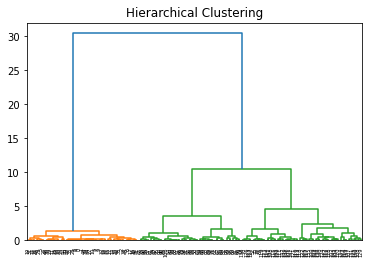

In [6]:
#metric:距離的計算方式
#method:群與群之間的計算方式，”single”, “complete”, “average”, “weighted”, “centroid”, “median”, “ward”
import scipy.cluster.hierarchy as sch
dis=sch.linkage(X,metric='euclidean',method='ward')
sch.dendrogram(dis)
plt.title('Hierarchical Clustering')
plt.show()

In [7]:
import numpy as np
from sklearn import metrics
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [8]:
purity_score(y_true, y_pred)

0.96